# **Customer Churn (ANN)**

The objective of this project is to build a robust **Artificial Neural Network (ANN)** model to predict **customer churn** in a retail banking context using historical customer attributes and behavioral data.


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data import
df = pd.read_csv('/content/Churn_Modelling.csv')
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns.')

The data has 10000 rows and 14 columns.


In [3]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Data sample
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Missing value check
df.isnull().sum()                  # Count of missing value in each attribute

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# Split the data into independent and dependent
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited']) # Selecting features which usefull for predictions
y = df['Exited'] # The output column

# **Data Pre-processing and Modeling**

In [8]:
# Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [9]:
# train test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Perfoming OneHotEncoting and StandardScaling (normalising) on tain and test dataset

# Selecting categorical and numerical columns
cat_cols = ['Geography', 'Gender']
num_cols = num_cols = [col for col in X_train.columns if col not in cat_cols]

# OneHotEncoting
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# StandardScaling
scaling = StandardScaler()
X_train_num = scaling.fit_transform(X_train[num_cols])
X_test_num = scaling.transform(X_test[num_cols])

# Combining categorical and numerical columns
X_train_processed = np.hstack((X_train_cat, X_train_num))
X_test_processed = np.hstack((X_test_cat, X_test_num))

X_train_processed.shape, X_test_processed.shape

((8000, 11), (2000, 11))

### **Building ANN Architecture**

In [11]:
# Importing required libraries for ANN
import keras
from keras.models import Sequential #ANN
from keras.layers import Dense, Dropout, Input

In [12]:
# Building the ANN Acrchitecture

# --- FEED FORWARD MECHANISM ---- # (Forward Propagation)

# initializing the model
model = Sequential([
    Input(shape=(X_train_processed.shape[1],)), # input layer

    Dense(32, activation='relu', kernel_initializer='he_uniform'), # first hidden layer (n × 32) + 32
    Dropout(0.3),

    Dense(16, activation='relu', kernel_initializer='he_uniform'), # second hidden layer (32 × 16) + 16
    Dropout(0.2),

    Dense(1, activation='sigmoid') # output layer - sigmoid - classification (16 × 1) + 1
])

# --- BACK PROPAGATION ---- #
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# ANN Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
class_weight = {
    0: 1.0,
    1: 3.0   # penalize churn misclassification
}

# Fitting the data inside the network architecture
model_history = model.fit(X_train_processed, y_train, validation_split=0.3, batch_size=10, epochs=20, class_weight=class_weight)

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6522 - loss: 1.0053 - val_accuracy: 0.7908 - val_loss: 0.5636
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7062 - loss: 0.9284 - val_accuracy: 0.7858 - val_loss: 0.5555
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7225 - loss: 0.8820 - val_accuracy: 0.7833 - val_loss: 0.5401
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7150 - loss: 0.8872 - val_accuracy: 0.7862 - val_loss: 0.5190
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7281 - loss: 0.8524 - val_accuracy: 0.7817 - val_loss: 0.5109
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7217 - loss: 0.8520 - val_accuracy: 0.7808 - val_loss: 0.5106
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7451 - loss: 0.8047 - val_accuracy: 0.7979 - val_loss: 0.4883
Epoch 8/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7470 - loss: 0.7998 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


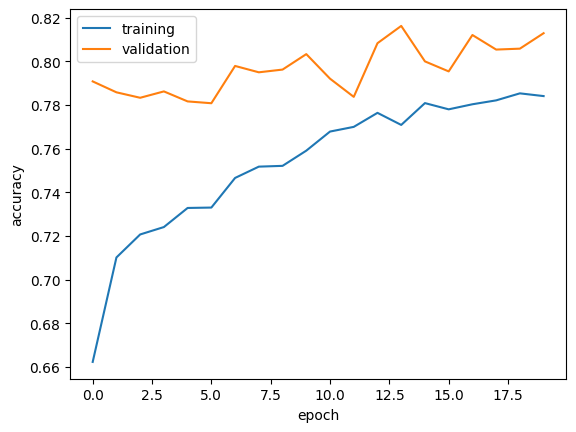

In [15]:
# Plot the accuracy vs val_accuracy
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

In [16]:
# Predict probabilities
y_pred_prob = model.predict(X_test_processed)

# Convert probabilities to 0 or 1 (binary classification)
y_pred = (y_pred_prob > 0.3).astype(int)

# Show first 10 predictions
print("Predicted Values (0 = No Churn, 1 = Churn):")
print(y_pred[:10])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Values (0 = No Churn, 1 = Churn):
[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.6405

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      1607
           1       0.34      0.89      0.49       393

    accuracy                           0.64      2000
   macro avg       0.65      0.73      0.61      2000
weighted avg       0.83      0.64      0.68      2000



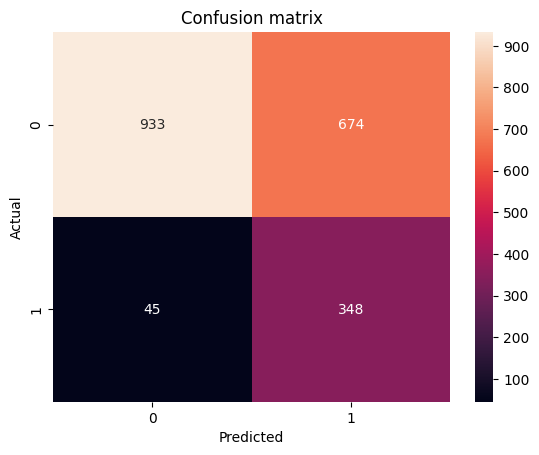

In [18]:
# Confusion matrix (Heatmap)
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
X_test.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [20]:
# Example new customer data
# Format must match the 10 input features
new_customer = pd.DataFrame({
    'CreditScore': [619],
    'Geography': ['France'],
    'Gender': ['Female'],
    'Age': [42],
    'Tenure': [2],
    'Balance': [0.0],
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [101348.88]
})

# Appling One-Hot Encoding
new_customer_cat = ohe.transform(new_customer[cat_cols])

# Appling Standard Scaling
new_customer_num = scaling.transform(new_customer[num_cols])

# Combining features
new_customer_processed = np.hstack((new_customer_cat, new_customer_num))

# predicting churn probability
prediction_prob = model.predict(new_customer_processed)[0][0]

# Convert probability to binary output
if prediction_prob >= 0.3:
    print(f"Prediction: Customer WILL churn (1) | Probability: {prediction_prob:.2f}")
else:
    print(f"Prediction: Customer will NOT churn (0) | Probability: {prediction_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: Customer WILL churn (1) | Probability: 0.50


# **Final Conclusion & Limitations**

### **Final Conclusion**

This project developed an end-to-end Artificial Neural Network (ANN) to predict customer churn in a retail banking dataset. After careful preprocessing—including removal of non-informative identifiers, one-hot encoding of categorical variables, and feature scaling—the ANN was trained using a controlled architecture and Stochastic Gradient Descent (SGD) optimizer.

I have used class-weighting and decision-threshold tuning, shifting the model from accuracy optimization toward churn detection effectiveness. As a result, recall for churned customers improved substantially, enabling the model to correctly identify the majority of customers at risk of leaving.

This trade-off reduced overall accuracy but significantly lowered false negatives, aligning the model with real-world business objectives where missing a churner is more costly than issuing false alerts. The final model demonstrates that performance metrics must be aligned with business impact rather than raw accuracy alone.

Overall, the project highlights the importance of modeling decisions, evaluation strategy, and threshold selection in applied machine learning systems, particularly for imbalanced classification tasks such as churn prediction.

---

### **Limitations**

Despite its strengths, the project has several limitations:

- **Reduced Precision for Churned Customers:**  
  Improving recall came at the cost of lower precision for churn predictions, leading to a higher number of false positives. While acceptable for churn prevention, this may increase operational intervention costs.

- **Threshold Sensitivity:**  
  Model performance is sensitive to the chosen probability threshold. A fixed threshold may not be optimal across different business scenarios or cost structures.

- **Limited Interpretability:**  
  Neural networks provide limited feature-level explainability compared to linear or tree-based models, making it harder to directly justify individual predictions.

- **No Hyperparameter Optimization:**  
  The ANN architecture and optimizer settings were chosen conservatively without extensive tuning. More systematic optimization could further improve performance.

- **Model Comparison Not Exhaustive:**  
  The project focuses on ANN performance; additional benchmarking against tree-based ensemble methods could offer stronger comparative insights.

---

### **Future Work**

Future improvements could include:
- Cost-based threshold optimization
- ROC-AUC–driven decision rules
- Model explainability using SHAP
- Comparison with gradient-boosting models
- Deployment-ready preprocessing pipelines

These enhancements would further align the model with production-level churn prediction systems.